# Proyecto de regresión

## Importación de librerías

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Funciones auxiliares

In [ ]:
def train_models(x_train, y_train, model_dict):
    for model_name, model in model_dict.items():
        pass


def test_models()

## Lectura de ficheros

In [15]:
df = pd.read_csv('../data/input/train_2_pr.csv')

display(df)

,Unnamed: 0,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,shipping_time
0,0,S000720,2019-06-08 07:17:51,A,Y,GB,IN,88.61000,355.00,0.7500,Air,SC3,Y,5.00741
1,1,S000725,2019-07-12 15:23:21,A,Y,GB,IN,85.65000,105.00,0.9000,Ocean,SC1,Y,21.41215
2,2,S000736,2019-10-04 14:23:29,A,Y,GB,IN,86.22000,100.00,0.7500,Air,SC3,Y,5.33692
3,3,S000738,2020-01-07 09:19:50,A,Y,GB,IN,94.43000,1071.00,1.0500,Air,SC2,Y,5.14792
4,4,S000739,2020-04-11 06:36:03,A,Y,GB,IN,94.24000,2007.00,0.7500,Air,SC3,Y,5.03067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,5109,S7631147,2020-03-31 10:32:09,A,X,GB,BD,104.86000,304.00,1.1250,Ocean,SC1,Y,15.26933
5110,5110,S9671147,2020-04-05 16:36:06,A,X,GB,BD,103.56125,240.00,0.5625,Ocean,SC2,Y,12.41192
5111,5111,S1407148,2020-04-09 10:59:51,A,X,GB,BD,105.55000,400.00,1.1250,Ocean,SC1,Y,5.68333
5112,5112,S7478148,2020-04-24 15:27:00,A,X,GB,BD,105.95000,398.00,1.1250,Ocean,SC1,Y,41.97199


## Limpieza base de los datos

In [16]:
df.drop(
    columns = [
        'Unnamed: 0',       # Índice sin uso
        'shipment_id',      # ID aleatorio sin significancia
        'pick_up_point',    # Toma un único valor
        'drop_off_point',   # Toma un único valor
        'selected'          # Toma un único valor
    ],
    inplace = True
)

display(df)

,send_timestamp,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,2019-06-08 07:17:51,GB,IN,88.61000,355.00,0.7500,Air,SC3,5.00741
1,2019-07-12 15:23:21,GB,IN,85.65000,105.00,0.9000,Ocean,SC1,21.41215
2,2019-10-04 14:23:29,GB,IN,86.22000,100.00,0.7500,Air,SC3,5.33692
3,2020-01-07 09:19:50,GB,IN,94.43000,1071.00,1.0500,Air,SC2,5.14792
4,2020-04-11 06:36:03,GB,IN,94.24000,2007.00,0.7500,Air,SC3,5.03067
...,...,...,...,...,...,...,...,...,...
5109,2020-03-31 10:32:09,GB,BD,104.86000,304.00,1.1250,Ocean,SC1,15.26933
5110,2020-04-05 16:36:06,GB,BD,103.56125,240.00,0.5625,Ocean,SC2,12.41192
5111,2020-04-09 10:59:51,GB,BD,105.55000,400.00,1.1250,Ocean,SC1,5.68333
5112,2020-04-24 15:27:00,GB,BD,105.95000,398.00,1.1250,Ocean,SC1,41.97199


## Escenarios de regresión

### Etiquetado de características categóricas + timestamp a segundos

In [17]:
# Labelizado de variables `source_country`, `destination_country`, `shipment_mode` y `shipping_company`

from sklearn.preprocessing import LabelEncoder

df['source_country'] = LabelEncoder().fit_transform(df['source_country'])
df['destination_country'] = LabelEncoder().fit_transform(df['destination_country'])
df['shipment_mode'] = LabelEncoder().fit_transform(df['shipment_mode'])
df['shipping_company'] = LabelEncoder().fit_transform(df['shipping_company'])

In [18]:
# Conversión de timestamp `send_timestamp` a segundos desde Epoch

df['send_timestamp'] = pd.to_datetime(df['send_timestamp']).astype(np.int64) // 10**9

In [19]:
# Mostrado de datos tras preprocesado

df.head()

,send_timestamp,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,shipping_time
0,1559978271,0,1,88.61,355.0,0.75,0,2,5.00741
1,1562945001,0,1,85.65,105.0,0.90,1,0,21.41215
2,1570199009,0,1,86.22,100.0,0.75,0,2,5.33692
3,1578388790,0,1,94.43,1071.0,1.05,0,1,5.14792
4,1586586963,0,1,94.24,2007.0,0.75,0,2,5.03067


In [20]:
# Generacion de subconjunto de datos para entrenamiento y prueba

from sklearn.model_selection import train_test_split

X = df.drop(['shipping_time'], axis=1)
y = df['shipping_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Creacion de tabla de resultados

models_results = pd.DataFrame(columns = [
    'Model',
    'Mean Squared Error',
    'Training time',
    'Prediction time'
])

In [22]:
# Entrenamiento y evaluación de SVM de regresion

from sklearn.svm import SVR
import time
from sklearn.metrics import mean_squared_error

kernel_list = ['poly', 'rbf', 'sigmoid']

for kernel in kernel_list:
    model = SVR(kernel=kernel)

    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    actual_results =  pd.DataFrame([[
            f'SVR ({kernel})',
            mean_squared_error(y_test, y_pred),
            training_time,
            prediction_time
        ]],
        columns = models_results.columns
    )

    if models_results.empty:
        models_results = actual_results
    else:
        models_results = pd.concat([models_results, actual_results], ignore_index=True)

In [23]:
# Entrenamiento y evaluación de Árbol de regresión

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

actual_results =  pd.DataFrame([[
        'Decision Tree Regressor',
        mean_squared_error(y_test, y_pred),
        training_time,
        prediction_time
    ]],
    columns = models_results.columns
)

if models_results.empty:
    models_results = actual_results
else:
    models_results = pd.concat([models_results, actual_results], ignore_index=True)

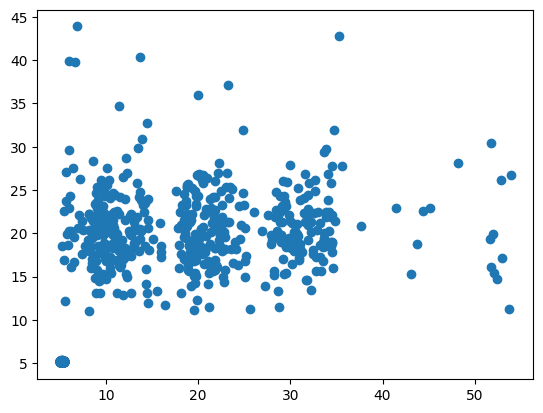

In [28]:
# Entrenamiento y evaluación de Random Forest de regresión

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

plt.scatter(x = y_test, y = y_pred)

actual_results =  pd.DataFrame([[
        'Random Forest Regressor',
        mean_squared_error(y_test, y_pred),
        training_time,
        prediction_time
    ]],
    columns = models_results.columns
)

if models_results.empty:
    models_results = actual_results
else:
    models_results = pd.concat([models_results, actual_results], ignore_index=True)

In [25]:
# Entrenamiento y evaluación de Ada Boost de regresión

from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()

start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

actual_results =  pd.DataFrame([[
        'Ada Boost Regressor',
        mean_squared_error(y_test, y_pred),
        training_time,
        prediction_time
    ]],
    columns = models_results.columns
)

if models_results.empty:
    models_results = actual_results
else:
    models_results = pd.concat([models_results, actual_results], ignore_index=True)

In [26]:
# Mostrado de resultados

display(models_results)

,Model,Mean Squared Error,Training time,Prediction time
0,SVR (poly),147.793387,0.521118,0.066041
1,SVR (rbf),152.028827,0.650279,0.358402
2,SVR (sigmoid),152.712261,0.844265,0.168072
3,Decision Tree Regressor,85.947546,0.058227,0.002010
4,Random Forest Regressor,57.712646,4.845341,0.036536
5,Ada Boost Regressor,48.420776,0.083519,0.002999


In [27]:
# Mostrado de resultados sin cuadrado (para mejor comprensión)

models_results['Mean Squared Error'] = models_results['Mean Squared Error'].apply(lambda x: np.sqrt(x))
models_results.columns = ['Model', 'Mean Error', 'Training time', 'Prediction time']

display(models_results)

,Model,Mean Error,Training time,Prediction time
0,SVR (poly),12.157030,0.521118,0.066041
1,SVR (rbf),12.329997,0.650279,0.358402
2,SVR (sigmoid),12.357680,0.844265,0.168072
3,Decision Tree Regressor,9.270790,0.058227,0.002010
4,Random Forest Regressor,7.596884,4.845341,0.036536
5,Ada Boost Regressor,6.958504,0.083519,0.002999


Estoy calentito ahora mismo, será a lo mejor del catarro-gripe